<a href="https://colab.research.google.com/github/SKS1401/ML-Project-University-Student-Dropout-Prediction/blob/main/University_Student_Dropout_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Day-1 👉 Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import shap

In [2]:
dataset=pd.read_csv('dataset.csv')
dataset

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


##Day-2 👉 Data Preprocessing (Part-1)


###Checking the head of the dataset

In [3]:
dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


###Checking the shape of the dataset

In [4]:
dataset.shape


(4424, 35)

###Checking how imbalanced dataset is

In [5]:
dataset['Target'].value_counts(normalize=True)

,proportion
Target,
Graduate,0.499322
Dropout,0.321203
Enrolled,0.179476


###Detecting the erroneous numeric columns by calculating the mean

In [6]:
#this dataset has no errorneous columns.Still checked some columns
print(dataset['Curricular units 2nd sem (enrolled)'].mean())

6.232142857142857


###Direct filtering - Keep only 'Dropout' and 'Graduate'

In [7]:
# Ensure 'Target' column is string type before filtering
dataset['Target'] = dataset['Target'].astype(str)
dataset = dataset[dataset['Target'] != 'Enrolled']

###Verification

In [8]:
dataset.shape


(3630, 35)

##Day-3 👉 Data Preprocessing (Part-2)


###Independent variable declaration

In [9]:
X=dataset.drop(columns=['Target'])
X

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,15,1,1,19,1,1,10,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,12,1,1,1,22,27,10,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9,1,1,1,22,27,8,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


###Dependent variable declaration

In [10]:
y=dataset['Target']
y

,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate
...,...
4419,Graduate
4420,Dropout
4421,Dropout
4422,Graduate


###mapping the y into binary 0 and 1--- Dropout(1) Graduate(0)

####Clean the column by removing leading/trailing spaces

In [11]:
y = y.astype(str).str.strip()

####now mapping to Binary

In [12]:
print("Unique values of y before mapping:", y.unique())
y = y.map({
    'Graduate': 0,
    'Dropout': 1
})
y

Unique values of y before mapping: ['Dropout' 'Graduate']


,Target
0,1
1,0
2,1
3,0
4,0
...,...
4419,0
4420,1
4421,1
4422,0


###Splitting the dataset into the training set and the test set

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

####Checking the shapes of X_train and X_test

In [14]:
X_train.shape


(2904, 34)

In [15]:
X_test.shape

(726, 34)

####Verifying the ratio of Yes or No is constant in both y_test and y_train

In [16]:
y_train.value_counts(normalize=True)

,proportion
Target,
0,0.608471
1,0.391529


In [17]:
y_test.value_counts(normalize=True)

,proportion
Target,
0,0.608815
1,0.391185


##Day-4 👉 Data Preprocessing (Part-3)

###One Hot Encoding


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

####Selecting the numeric columns in X


In [19]:
num_cols = [
    'Application order',
    'Age at enrollment',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]
num_cols



['Application order',
 'Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

####Selecting the categorical column in X

In [20]:
categorical_cols=X.drop(columns=num_cols).columns.tolist()
categorical_cols

['Marital status',
 'Application mode',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International']

####Column transformations

In [21]:
pre=ColumnTransformer(
    transformers=[
        ("cat",OneHotEncoder(handle_unknown='ignore',sparse_output=False),categorical_cols),
        ("num","passthrough",num_cols)
    ]
  )

In [22]:
print(pre.fit_transform(X))

[[ 1.    0.    0.   ... 10.8   1.4   1.74]
 [ 1.    0.    0.   ... 13.9  -0.3   0.79]
 [ 1.    0.    0.   ... 10.8   1.4   1.74]
 ...
 [ 1.    0.    0.   ... 13.9  -0.3   0.79]
 [ 1.    0.    0.   ...  9.4  -0.8  -3.12]
 [ 1.    0.    0.   ... 12.7   3.7  -1.7 ]]


##Day-5 👉 Data Preprocessing (Part-4)

###Getting names of encoded categorical columns

In [23]:
cat_iv_names=pre.named_transformers_['cat'].get_feature_names_out(categorical_cols)
print(cat_iv_names)

['Marital status_1' 'Marital status_2' 'Marital status_3'
 'Marital status_4' 'Marital status_5' 'Marital status_6'
 'Application mode_1' 'Application mode_2' 'Application mode_3'
 'Application mode_4' 'Application mode_5' 'Application mode_6'
 'Application mode_7' 'Application mode_8' 'Application mode_9'
 'Application mode_10' 'Application mode_11' 'Application mode_12'
 'Application mode_13' 'Application mode_14' 'Application mode_15'
 'Application mode_16' 'Application mode_17' 'Application mode_18'
 'Course_1' 'Course_2' 'Course_3' 'Course_4' 'Course_5' 'Course_6'
 'Course_7' 'Course_8' 'Course_9' 'Course_10' 'Course_11' 'Course_12'
 'Course_13' 'Course_14' 'Course_15' 'Course_16' 'Course_17'
 'Daytime/evening attendance_0' 'Daytime/evening attendance_1'
 'Previous qualification_1' 'Previous qualification_2'
 'Previous qualification_3' 'Previous qualification_4'
 'Previous qualification_5' 'Previous qualification_6'
 'Previous qualification_7' 'Previous qualification_8'
 'Previous

###Combining the categorical columns with the numeric columns after OneHotEncoding

In [24]:
all_iv_names=list(cat_iv_names)+num_cols
print(all_iv_names)

['Marital status_1', 'Marital status_2', 'Marital status_3', 'Marital status_4', 'Marital status_5', 'Marital status_6', 'Application mode_1', 'Application mode_2', 'Application mode_3', 'Application mode_4', 'Application mode_5', 'Application mode_6', 'Application mode_7', 'Application mode_8', 'Application mode_9', 'Application mode_10', 'Application mode_11', 'Application mode_12', 'Application mode_13', 'Application mode_14', 'Application mode_15', 'Application mode_16', 'Application mode_17', 'Application mode_18', 'Course_1', 'Course_2', 'Course_3', 'Course_4', 'Course_5', 'Course_6', 'Course_7', 'Course_8', 'Course_9', 'Course_10', 'Course_11', 'Course_12', 'Course_13', 'Course_14', 'Course_15', 'Course_16', 'Course_17', 'Daytime/evening attendance_0', 'Daytime/evening attendance_1', 'Previous qualification_1', 'Previous qualification_2', 'Previous qualification_3', 'Previous qualification_4', 'Previous qualification_5', 'Previous qualification_6', 'Previous qualification_7', 'P

###Converting the transformed output to a DataFrame after OneHotEncoding

In [25]:
X_transformed=pre.fit_transform(X)
tr_df=pd.DataFrame(X_transformed,columns=all_iv_names)
pd.set_option('display.max_columns',None)
print(tr_df)

      Marital status_1  Marital status_2  Marital status_3  Marital status_4  \
0                  1.0               0.0               0.0               0.0   
1                  1.0               0.0               0.0               0.0   
2                  1.0               0.0               0.0               0.0   
3                  1.0               0.0               0.0               0.0   
4                  0.0               1.0               0.0               0.0   
...                ...               ...               ...               ...   
3625               1.0               0.0               0.0               0.0   
3626               1.0               0.0               0.0               0.0   
3627               1.0               0.0               0.0               0.0   
3628               1.0               0.0               0.0               0.0   
3629               1.0               0.0               0.0               0.0   

      Marital status_5  Marital status_

## Day-6 👉 Training the Baseline Model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [27]:
pipe_lr=Pipeline([
    ("preprocessing",pre),
    ("classification",LogisticRegression(max_iter=5000,class_weight="balanced"))
])

In [28]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Marital status',
                                                   'Application mode', 'Course',
                                                   'Daytime/evening attendance',
                                                   'Previous qualification',
                                                   'Nacionality',
                                                   "Mother's qualification",
                                                   "Father's qualification",
                                                   "Mother's occupation",
                                                   "Father's occupation",
                                                   'Displaced',
                                                   'Educat...
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Curricular units 2nd sem '
                                                   '(evaluations)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(without evaluations)',
                                                   'Unemployment rate',
                                                   'Inflation rate',
                                                   'GDP'])])),
                ('classification',
                 LogisticRegression(class_weight='balanced', max_iter=5000))])

##Day-7 👉 Model Evaluation (Part-1)

###Predicted Values of y

In [29]:
y_pred=pipe_lr.predict(X_test)
print(y_pred[:10])

[0 0 0 0 1 0 0 1 1 1]


In [30]:
y_test.head(10)

,Target
3622,0
4325,0
1558,1
3458,0
4291,0
2224,0
1451,0
2914,1
3405,0
605,1


###Predicted Probabilities of y

In [31]:
y_proba_pred=pipe_lr.predict_proba(X_test)[:,1]
print(y_proba_pred[:10])

[0.00826178 0.05218447 0.36364066 0.05450705 0.58870669 0.04871897
 0.04281745 0.9950738  0.75771206 0.83453534]


In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

###Confusion Matrix

In [33]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[402  40]
 [ 18 266]]


###F1 Score

In [34]:
f1 = f1_score(y_test, y_pred)
print(f1)


0.9016949152542373


###Accuracy Score

In [35]:
accuracy_score(y_test,y_pred)

0.9201101928374655

##Day-8 👉 Model Evaluation (Part-2)

###ROC_AUC Score

In [36]:
from sklearn.metrics import roc_auc_score

In [37]:
roc_score=roc_auc_score(y_test,y_proba_pred)
print(roc_score)

0.9758221273341406


###Checking the significant Dropout predictors using coefficients?

In [38]:
coef=pipe_lr.named_steps['classification'].coef_[0]


fitted_preprocessor = pipe_lr.named_steps['preprocessing']


cat_iv_names_pipeline = fitted_preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)


all_iv_names_pipeline = list(cat_iv_names_pipeline) + num_cols

importance_df=pd.DataFrame(
    {
        'feature': all_iv_names_pipeline,
        'coefficient': coef
    }
).sort_values(by='coefficient',ascending=False,key=abs)
print(importance_df)

                       feature  coefficient
38                   Course_16     1.382478
29                    Course_7     1.269857
209  Tuition fees up to date_1    -1.181230
208  Tuition fees up to date_0     1.084175
134      Mother's occupation_1     1.059877
..                         ...          ...
133  Father's qualification_34     0.000660
5             Marital status_6     0.000412
113  Father's qualification_11     0.000269
130  Father's qualification_31     0.000059
46    Previous qualification_5     0.000044

[233 rows x 2 columns]


###Identifying Significant Dropout Predictors Using Shap

In [39]:
import shap

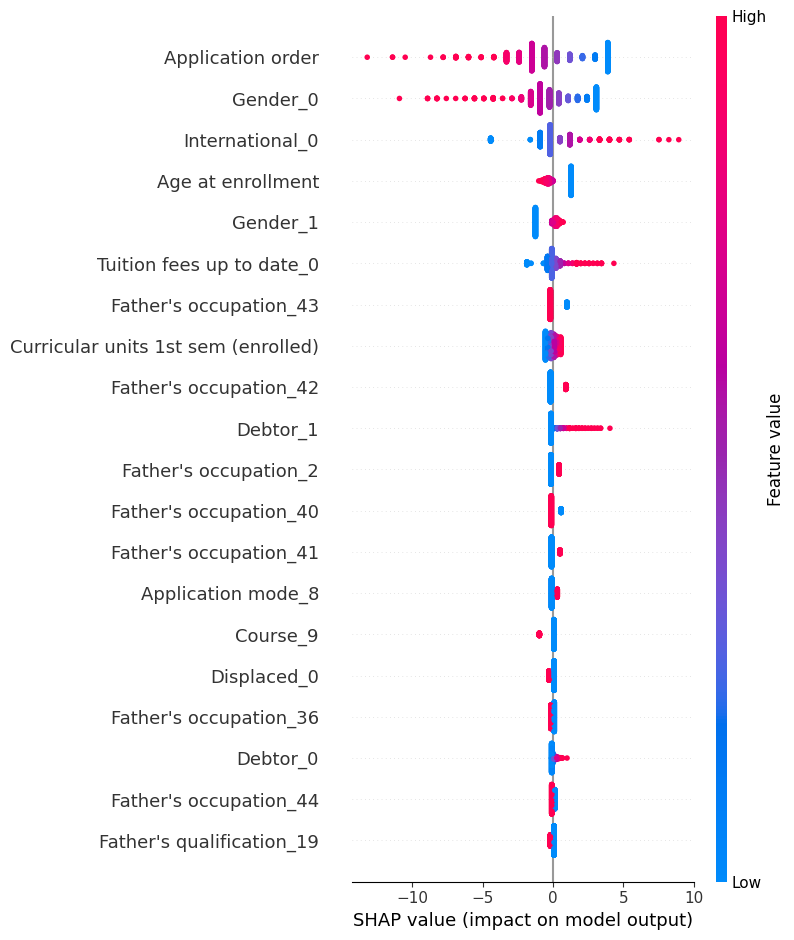

In [40]:
model=pipe_lr.named_steps['classification']
X_transformed=pre.transform(X_test)
explainer=shap.LinearExplainer(model,X_transformed)
shap_values=explainer.shap_values(X_transformed)
shap.summary_plot(shap_values,X_transformed,feature_names=all_iv_names)

###Checking a specific student’s Dropout prediction

In [41]:
student=X_test.iloc[[10]]
prediction=pipe_lr.predict(student)
print(prediction)

[0]


In [42]:
print(y_test.iloc[[10]])

4345    0
Name: Target, dtype: int64
